# <b>Lead Scoring Case Study</b>

<h2>Goals of the Case Study</h2>

* Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.<br><br>
* There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## Case Study Approach-<br>
   
##### 1. Loading Datasets
##### 2. Data Understanding
   * Checking Structure of data sets
   * Checking other attributes like using info(), describe(), etc 
   
##### 3. Data Cleaning
   * Deleting unnecessary columns and rows
   * Data Quality check - Analysing missing values, improper dtypes, duplicated rows
   * Imputing Missing values 
   * Changing improper data types
   
##### 4. Handling Outliers
   
##### 5. Data Analysis
   * Imbalance Analysis
   * Defining functions for plotting
   * Univariate analysis of each variable 
   
##### 6. Data Preparation
   * Dummy Variable Creation
   * Train Test Split
   * Feature Scaling
   * Loking at correlations
   
##### 7. Data Modelling
   
##### 8. Model Evaluation
   * Calculating important metrics (sensitivity, specificity, recall, precision, F1-score, etc)
   * Ploting ROC curve
   * ploting precision ans recall trade off
   * finding optimal cut off probability
   * Making predictions using test dataset
   
##### 9. Final Observations and Summary

# 1 Reading and Understanding Data

In [441]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns, plotly.express as px

In [442]:
import warnings
warnings.filterwarnings('ignore')
import os
os.chdir('C:\\Users\\91703/Downloads') #changing the working directory

In [443]:
pd.set_option('max_rows',None, 'max_columns', None, 'display.width', None, 'display.max_colwidth', None, 'display.max_rows', None)  

In [444]:
datadict = pd.read_excel('Leads Data Dictionary.xlsx', header = 2, usecols = [1,2] )
datadict # reading data dictionary

,Variables,Description
0,Prospect ID,A unique ID with which the customer is identified.
1,Lead Number,A lead number assigned to each lead procured.
2,Lead Origin,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."
3,Lead Source,"The source of the lead. Includes Google, Organic Search, Olark Chat, etc."
4,Do Not Email,An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
5,Do Not Call,An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
6,Converted,The target variable. Indicates whether a lead has been successfully converted or not.
7,TotalVisits,The total number of visits made by the customer on the website.
8,Total Time Spent on Website,The total time spent by the customer on the website.
9,Page Views Per Visit,Average number of pages on the website viewed during the visits.


In [445]:
leads = pd.read_csv('Leads.csv')
leads.head()  # reading Leads dataset

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [446]:
leads.info() # checking summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [447]:
leads.describe(include='all')   # checking statistical summary of all variables

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,NaN,NaN,1,2,16
top,1c34c57d-f572-4011-acbe-3ac8e94cc2aa,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [448]:
leads.shape  # checking shape of dataset

(9240, 37)

## Data Cleaning

In [449]:
# checking for duplicated rows
leads.duplicated().sum() 

0

### <i><b>Analyzing and Imputing missing values</b></i>

###### From the Problem statement we know that any entry labeled as `select` is same as `NaN`<br> so replacing select with NaN and looking at null value percentages of each columns

In [450]:
leads.replace('Select',np.nan, inplace= True)

In [451]:
leads.shape # checking shape of leads dataset

(9240, 37)

### Supposition<hr>
* <b><i>The leads Dataset contains customer filled as well as sales team generated columns</i></b>
* <b><i>If in a row most of the customer filled columns are empty that means the particular customer has only partially filled the form</i></b>
* <b><i>If in a row 70% of data in the customer filled columns is missing then that row(customer) information is of no use</i></b>
* <b><i>as we have insufficient data for that customer</i></b>
* <b><i>So it is better to drop such rows</i></b>

In [452]:
# creating a list of customer filled columns
customer_columns = leads.columns[~leads.columns.isin(['Last activity','last notable activity','lead profile','tags','lead quality',
                 'Lead Number','Prospect ID','Asymmetrique Activity Index','Asymmetrique Profile Index',
                 'Asymmetrique Activity Score','Asymmetrique Profile Score'])]

In [453]:
df = pd.DataFrame(columns = leads.columns) 
# creating a dataframe with columns being all the customer filled columns in leads dataset

for i in range(len(leads)):  
    if (leads[customer_columns]).iloc[i].isnull().sum() / len(leads[customer_columns].columns) >= 0.7: #checking if percentage of missing values is >= 70%   
        df.loc[len(df.index)] = (leads.iloc[i].values.tolist()) # adding ith row to dataframe df
        
# iterating over each row and finding percentage of missing values in each row(considering only columns which are filled by customers) 
# if the percentage of missing values is >= 70% then adding that whole row to dataframe 'df'
# then we can delete those particular rows from leads dataset

In [454]:
df.shape # checking shape of dataframe df

(0, 37)

## Insight<hr>
* We dont have any row which has 70% or more data missing in customer filled columns

In [455]:
leads.isnull().sum()  # checking total nulvalues in each variable

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [456]:
leads.isnull().sum()/len(leads)*100 # checking null value percentage in each column

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [457]:
# looking at columns having null values greater than 20%
leads.columns[(leads.isnull().sum()/len(leads)*100 > 20)] 

Index(['Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

## Insight<hr>
* The variables `Asymmetrique Activity Index`, `Asymmetrique Profile Index`, `Asymmetrique Activity Score` and `Asymmetrique Profile Score` have more than 40% data missing so we can drop them

### Country

In [458]:
leads.Country.value_counts(normalize = True) 

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
Germany                 0.000590
Canada                  0.000590
Kuwait                  0.000590
South Africa            0.000590
Nigeria                 0.000590
Sweden                  0.000443
Belgium                 0.000295
Netherlands             0.000295
China                   0.000295
Bangladesh              0.000295
Ghana                   0.000295
Asia/Pacific Region     0.000295
Philippines             0.000295
Italy                   0.000295
Uganda                  0.000295
Tanzania                0.000148
Russia                  0.000148
Switzerlan

## Insight<hr>

* As 95% of non-null entries are `India` and 26% of all entries are null values we can drop `Country` column as it doesn't provide much information and data is highly skewed

### Specialization

In [459]:
leads.Specialization.value_counts(normalize= True, dropna= False)

NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

## Insight<hr>
* we have about 36% missing values in 'Specialization' column with a lot of categories which if imputed can deprecate the data quality, so it is better to drop it

### How did you hear about X Education

In [460]:
leads['How did you hear about X Education'].value_counts(normalize= True, dropna= False)
# checking value counts of 'How did you hear about X Education' variable

NaN                      0.784632
Online Search            0.087446
Word Of Mouth            0.037662
Student of SomeSchool    0.033550
Other                    0.020130
Multiple Sources         0.016450
Advertisements           0.007576
Social Media             0.007251
Email                    0.002814
SMS                      0.002489
Name: How did you hear about X Education, dtype: float64

## Insight<hr>
* we have about 78% missing values in 'How did you hear about X Education' column, so it is better to drop it

### What is your current occupation

In [461]:
leads['What is your current occupation'].value_counts(normalize = True, dropna= False)

Unemployed              0.606061
NaN                     0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

## Insight<hr>
* As `What is your current occupation` can be an important factor for targeting leads we are not dropping it
* We can observe the data is bit skewed towards `Unemployed` so we can impute missing values in 'What is your current occupation' with modal value or proportional imputation also we will group entries with very small percentages after imputation

###  What matters most to you in choosing a course

In [462]:
leads['What matters most to you in choosing a course'].value_counts(normalize = True, dropna = False)*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

## Insight<hr>
* As we have 29% null values in `What matters most to you in choosing a course` variable and about 70% of fields are `Better Career Prospects` while other fields are almost negligible, so we can drop this column because it dosen't contribute anything significant to our analysis

### Tags

In [463]:
leads.Tags.value_counts(normalize = True)*100

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

## Insight<hr>
* We have 36% missing values in Tags column with lot of categories, so it is better to drop it

### lead quality

In [464]:
leads['Lead Quality'].value_counts(normalize = True, dropna = False)

NaN                  0.515909
Might be             0.168831
Not Sure             0.118182
High in Relevance    0.068939
Worst                0.065043
Low in Relevance     0.063095
Name: Lead Quality, dtype: float64

## Insight<hr>
* we have 51% null values in Lead Quality column,  so it is better to drop it

### Lead Profile

In [465]:
leads['Lead Profile'].value_counts(normalize = True)

Potential Lead                 0.676310
Other Leads                    0.204193
Student of SomeSchool          0.101048
Lateral Student                0.010063
Dual Specialization Student    0.008386
Name: Lead Profile, dtype: float64

## Insight<hr>
* Considering select as null values we have about 74% null values in Lead Profile column,  so it is better to drop it

### City

In [466]:
leads.City.value_counts(normalize= True, dropna= False)

NaN                            0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

## Insight<hr>
* we have almost 40% missing values in 'City' column, so it is better to drop it

####  <b><i>Deleting the variables we considered to drop in above analysis which have high missing values and cannot be imputed<br><br>Also deleting `Prospect ID` and `Lead Number` as they are index columns/unique identifiers, so they wont contribute anything to analysis</i></b>

In [467]:
# dropping redundant variables
leads = leads.drop(['Prospect ID', 'Lead Number', 'Country', 'Specialization', 'How did you hear about X Education',
                    'What matters most to you in choosing a course','Tags', 'Lead Quality','Lead Profile','City',  
                    'Asymmetrique Activity Index','Asymmetrique Profile Index', 'Asymmetrique Activity Score',
                     'Asymmetrique Profile Score'], axis = 1)

In [468]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [469]:
leads.isnull().sum()/len(leads)*100 #checking null value percentages of remaining columns

Lead Origin                                  0.000000
Lead Source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.482684
Last Activity                                1.114719
What is your current occupation             29.112554
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement                        0.000000
Through Recommendations                      0.000000
Receive More Updates About Our Courses       0.000000
Update me on Supply Chain Co

###### We can delete the null values in columns having less than 2% data missing as it'll not take away huge chunk of data

In [470]:
leads.shape

(9240, 23)

In [471]:
# deleting rows having missing values of columns having less than 2% data missing
leads = leads[-(leads['Lead Source'].isnull() | leads.TotalVisits.isnull() | leads['Page Views Per Visit'].isnull() |
leads['Last Activity'].isnull())]

In [472]:
leads.shape

(9074, 23)

#### <b><i>We have about 98% of data retained after removing missing values of above columns</i></b>

In [473]:
leads.isnull().sum()/len(leads)*100 #checking null value percentages of remaining columns

Lead Origin                                  0.000000
Lead Source                                  0.000000
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  0.000000
Total Time Spent on Website                  0.000000
Page Views Per Visit                         0.000000
Last Activity                                0.000000
What is your current occupation             29.567996
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement                        0.000000
Through Recommendations                      0.000000
Receive More Updates About Our Courses       0.000000
Update me on Supply Chain Co

###### Renaming few columns and then imputing missing values of remaining columns

In [474]:
leads.rename(columns = {'What is your current occupation':'current_occupation',
       'I agree to pay the amount through cheque':'agree_to_pay_through_cheque'}, inplace = True)

###### Imputing missing values in current_occupation column

### current_occupation

In [475]:
leads['current_occupation'].value_counts(normalize = True)

Unemployed              0.856830
Working Professional    0.105930
Student                 0.032233
Other                   0.002347
Housewife               0.001408
Businessman             0.001252
Name: current_occupation, dtype: float64

###### We can group entries , `Other`, `Housewife` and `Businessman` in a single category `Other`

In [476]:
# grouping small entries in 'current_occupation' as 'Other'
leads.loc[(leads['current_occupation'].isin(['Other','Housewife','Businessman'])),['current_occupation']] = 'Other'                   

In [477]:
leads['current_occupation'].value_counts(normalize = True)

Unemployed              0.856830
Working Professional    0.105930
Student                 0.032233
Other                   0.005007
Name: current_occupation, dtype: float64

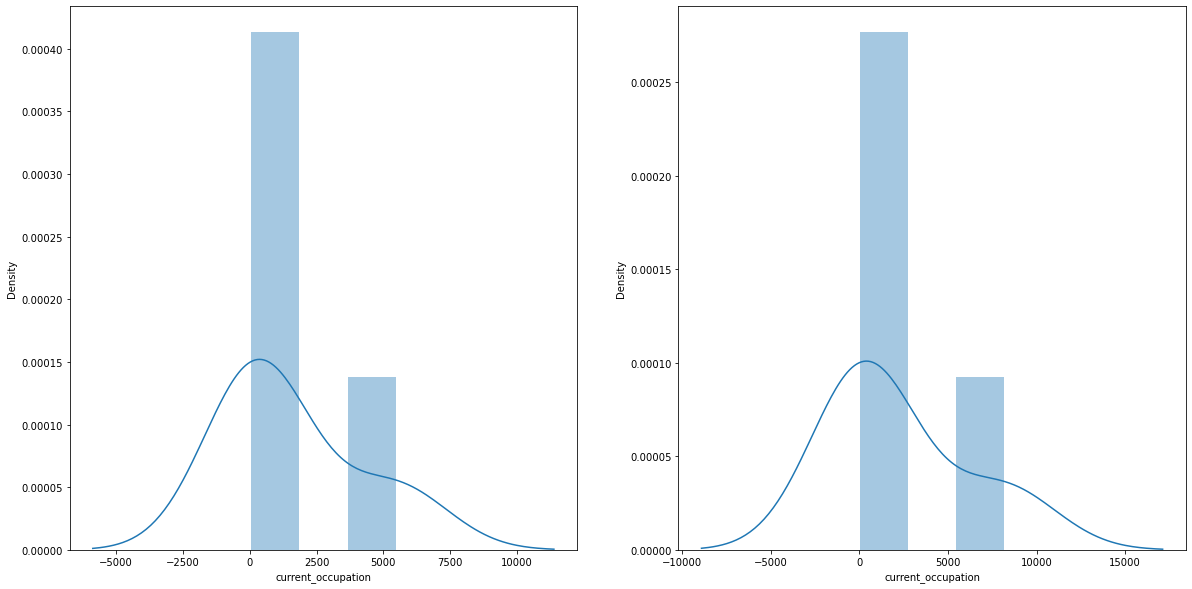

In [478]:
# plotting distplot to check the original distribution and distribution after imputing valeus proportionally
plt.figure(figsize = [20,10])

plt.subplot(1,2,1)
sns.distplot(leads['current_occupation'].value_counts())

plt.subplot(1,2,2)
sns.distplot(leads['current_occupation'].fillna(leads['current_occupation'].mode()[0]).value_counts()) 
# subplot 2 shows distribution after we have imputed the values proportionally
plt.show()



# pd.Series(random.choice([leads['current_occupation'].value_counts().index],
#                         p= leads['current_occupation'].value_counts(normalize= True).values.tolist(),   
#                         len(leads)))).value_counts()

## Insight<hr>

* The data distribution stays similar after imputing missing values with, so we can impute the missings values with modal value

In [479]:
leads['current_occupation'].fillna(leads['current_occupation'].mode()[0], inplace= True)
# imputing missing values with above method

In [480]:
leads['current_occupation'].value_counts(normalize = True)

Unemployed              0.899162
Working Professional    0.074609
Student                 0.022702
Other                   0.003527
Name: current_occupation, dtype: float64

### <b><i>Grouping categories in columns having very small value counts</i></b>

### Lead Source

In [481]:
leads['Lead Source'].value_counts(normalize = True)
# checking value count percentages of 'Lead Source' variable

Google               0.316068
Direct Traffic       0.280251
Olark Chat           0.193189
Organic Search       0.127177
Reference            0.048821
Welingak Website     0.014216
Referral Sites       0.013776
Facebook             0.003416
bing                 0.000661
google               0.000551
Click2call           0.000441
Press_Release        0.000220
Social Media         0.000220
Live Chat            0.000220
Pay per Click Ads    0.000110
testone              0.000110
blog                 0.000110
NC_EDM               0.000110
welearnblog_Home     0.000110
WeLearn              0.000110
youtubechannel       0.000110
Name: Lead Source, dtype: float64

###### We have some fields which are same but due to different case are cosidered different, so combining them and also combining fields with very less percentage into a single field named other

In [482]:
leads['Lead Source'].replace('google','Google',inplace = True)
# replacing 'google' to 'Google'

In [483]:
l = leads['Lead Source'].value_counts(normalize = True)[(leads['Lead Source'].value_counts(normalize = True) < 0.01).values].index           
l  # l contains fields having less than 2% values in 'Lead Source' column

Index(['Facebook', 'bing', 'Click2call', 'Social Media', 'Press_Release',
       'Live Chat', 'Pay per Click Ads', 'youtubechannel', 'blog',
       'welearnblog_Home', 'WeLearn', 'testone', 'NC_EDM'],
      dtype='object')

In [484]:
leads.loc[(leads['Lead Source'].isin(l)),['Lead Source']] = 'Other'
# replacing each field having value count percentage less than 2% to 'Other'

In [485]:
leads['Lead Source'].value_counts(normalize = True)

Google              0.316619
Direct Traffic      0.280251
Olark Chat          0.193189
Organic Search      0.127177
Reference           0.048821
Welingak Website    0.014216
Referral Sites      0.013776
Other               0.005951
Name: Lead Source, dtype: float64

### Last Activity

In [486]:
leads['Last Activity'].value_counts(normalize = True)
# checking value count percentage of each field in Last Activity column

Email Opened                    0.378223
SMS Sent                        0.299317
Olark Chat Conversation         0.107119
Page Visited on Website         0.070531
Converted to Lead               0.047168
Email Bounced                   0.034384
Email Link Clicked              0.029425
Form Submitted on Website       0.012784
Unreachable                     0.009918
Unsubscribed                    0.006502
Had a Phone Conversation        0.002755
View in browser link Clicked    0.000661
Approached upfront              0.000551
Email Marked Spam               0.000220
Email Received                  0.000220
Resubscribed to emails          0.000110
Visited Booth in Tradeshow      0.000110
Name: Last Activity, dtype: float64

In [487]:
l = leads['Last Activity'].value_counts(normalize = True)[(leads['Last Activity'].value_counts(normalize = True) < 0.03).values].index   
l  #creating a list containg fields which have less than 3% value counts

Index(['Email Link Clicked', 'Form Submitted on Website', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'View in browser link Clicked', 'Approached upfront',
       'Email Marked Spam', 'Email Received', 'Resubscribed to emails',
       'Visited Booth in Tradeshow'],
      dtype='object')

In [488]:
leads.loc[(leads['Last Activity'].isin(l)),'Last Activity']= 'Other'

In [489]:
leads['Last Activity'].value_counts(normalize = True)
# checking value count percentage of each field in Last Activity column

Email Opened               0.378223
SMS Sent                   0.299317
Olark Chat Conversation    0.107119
Page Visited on Website    0.070531
Other                      0.063258
Converted to Lead          0.047168
Email Bounced              0.034384
Name: Last Activity, dtype: float64

In [490]:
leads.isnull().sum()
# checking null values in each column again

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
current_occupation                        0
Search                                    0
Magazine                                  0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
Receive More Updates About Our Courses    0
Update me on Supply Chain Content         0
Get updates on DM Content                 0
agree_to_pay_through_cheque               0
A free copy of Mastering The Interview    0
Last Notable Activity           

###### We have Imputed all the missing values. Now changing improper data types 

### <b><i>Changing Improper data types</i></b>

In [491]:
leads.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Do Not Call                                object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
current_occupation                         object
Search                                     object
Magazine                                   object
Newspaper Article                          object
X Education Forums                         object
Newspaper                                  object
Digital Advertisement                      object
Through Recommendations                    object
Receive More Updates About Our Courses     object
Update me on Supply Chain Content          object
Get updates on DM Content                  object


###### changing data types of `TotalVisits` and `Page Views Per Visit` from float64 to int as total visit and page views can only be integers

In [492]:
leads.TotalVisits = leads.TotalVisits.astype('int64')
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].astype('int64')
# changing data types

In [493]:
leads.dtypes
# checking data types of each column

Lead Origin                               object
Lead Source                               object
Do Not Email                              object
Do Not Call                               object
Converted                                  int64
TotalVisits                                int64
Total Time Spent on Website                int64
Page Views Per Visit                       int64
Last Activity                             object
current_occupation                        object
Search                                    object
Magazine                                  object
Newspaper Article                         object
X Education Forums                        object
Newspaper                                 object
Digital Advertisement                     object
Through Recommendations                   object
Receive More Updates About Our Courses    object
Update me on Supply Chain Content         object
Get updates on DM Content                 object
agree_to_pay_through

###### From above output  we can observe that all object data types columns are in their appropriate dtype<br>Also we have handled the improper numeric dtypes as well.

### <i><b>Data Quality Check</b></i>

In [494]:
leads.nunique()
# looking at how many unique fields are there in each column

Lead Origin                                  4
Lead Source                                  8
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1717
Page Views Per Visit                        19
Last Activity                                7
current_occupation                           4
Search                                       2
Magazine                                     1
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
Receive More Updates About Our Courses       1
Update me on Supply Chain Content            1
Get updates on DM Content                    1
agree_to_pay_through_cheque                  1
A free copy o

###### As `Last Notable Activity` column being an object data type has 16 unique fields<br> so checking `Last Notable Activity` column

### Last Notable Activity

In [495]:
leads['Last Notable Activity'].value_counts(normalize= True)

Modified                        0.360040
Email Opened                    0.311109
SMS Sent                        0.237161
Page Visited on Website         0.035045
Olark Chat Conversation         0.020168
Email Link Clicked              0.019065
Email Bounced                   0.006612
Unsubscribed                    0.004959
Unreachable                     0.003527
Had a Phone Conversation        0.001543
Email Marked Spam               0.000220
Resubscribed to emails          0.000110
View in browser link Clicked    0.000110
Form Submitted on Website       0.000110
Approached upfront              0.000110
Email Received                  0.000110
Name: Last Notable Activity, dtype: float64

###### Grouping categories with less than 1% value counts

In [496]:
l = leads['Last Notable Activity'].value_counts(normalize = True)[(leads['Last Notable Activity'].value_counts(normalize = True) < 0.01).values].index   
l  #creating a list containg categories which have less than 1% value counts

Index(['Email Bounced', 'Unsubscribed', 'Unreachable',
       'Had a Phone Conversation', 'Email Marked Spam',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Approached upfront', 'Email Received'],
      dtype='object')

In [497]:
leads.loc[(leads['Last Notable Activity'].isin(l)),'Last Notable Activity'] = 'Other'
# grouping categories above categories

In [498]:
leads['Last Notable Activity'].value_counts(normalize= True)

Modified                   0.360040
Email Opened               0.311109
SMS Sent                   0.237161
Page Visited on Website    0.035045
Olark Chat Conversation    0.020168
Email Link Clicked         0.019065
Other                      0.017412
Name: Last Notable Activity, dtype: float64

In [499]:
leads.dtypes
# checking dtypes

Lead Origin                               object
Lead Source                               object
Do Not Email                              object
Do Not Call                               object
Converted                                  int64
TotalVisits                                int64
Total Time Spent on Website                int64
Page Views Per Visit                       int64
Last Activity                             object
current_occupation                        object
Search                                    object
Magazine                                  object
Newspaper Article                         object
X Education Forums                        object
Newspaper                                 object
Digital Advertisement                     object
Through Recommendations                   object
Receive More Updates About Our Courses    object
Update me on Supply Chain Content         object
Get updates on DM Content                 object
agree_to_pay_through

In [500]:
leads.nunique() 
# checking number of unique fields in each column

Lead Origin                                  4
Lead Source                                  8
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1717
Page Views Per Visit                        19
Last Activity                                7
current_occupation                           4
Search                                       2
Magazine                                     1
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
Receive More Updates About Our Courses       1
Update me on Supply Chain Content            1
Get updates on DM Content                    1
agree_to_pay_through_cheque                  1
A free copy o

## Insight<hr>
* We can observe that few variables have only one category in them.<br>As they will not contribute anything meaningful to analysis so we can drop them

In [501]:
c=-1
l = []  # creating an empty list
for i in leads.nunique():
    c+=1   #checking if a variable has only 1 category in it and appending its column name to list l
    if i == 1:
        l.append(leads.nunique().index[c])
l

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'agree_to_pay_through_cheque']

In [502]:
leads.drop(l, axis= 1, inplace= True) #dropping columns having only one category

In [503]:
leads.nunique() 

Lead Origin                                  4
Lead Source                                  8
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1717
Page Views Per Visit                        19
Last Activity                                7
current_occupation                           4
Search                                       2
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
A free copy of Mastering The Interview       2
Last Notable Activity                        7
dtype: int64

In [504]:
# checking value_counts of all columns with data type as object
# to asses if any column is of different data type but considered as object due to any irregularities
for i in leads.columns[(leads.dtypes == 'object').values]:  # iterating over column names with 'object' stype
    print('\033[4m'+'\033[94m'+i)  # print blue and underlined column names
    print('\033[0m', end = '') # changing back to normal text
    print(leads[i].value_counts(normalize= True), sep= '\n')  # printing value counts
    print('*******************************************************************')

Lead Origin
Landing Page Submission    0.538351
API                        0.394313
Lead Add Form              0.064029
Lead Import                0.003306
Name: Lead Origin, dtype: float64
*******************************************************************
Lead Source
Google              0.316619
Direct Traffic      0.280251
Olark Chat          0.193189
Organic Search      0.127177
Reference           0.048821
Welingak Website    0.014216
Referral Sites      0.013776
Other               0.005951
Name: Lead Source, dtype: float64
*******************************************************************
Do Not Email
No     0.921093
Yes    0.078907
Name: Do Not Email, dtype: float64
*******************************************************************
Do Not Call
No     0.99978
Yes    0.00022
Name: Do Not Call, dtype: float64
*******************************************************************
Last Activity
Email Opened               0.378223
SMS Sent                   0.299317
Olark Chat Convers

###### All columns have appropriate data types also all missing values are imputed<br> Some columns have highely skewed data, but we will drop them after EDA while data preparation and modelling 


### <i><b>Handling Outliers</i></b>

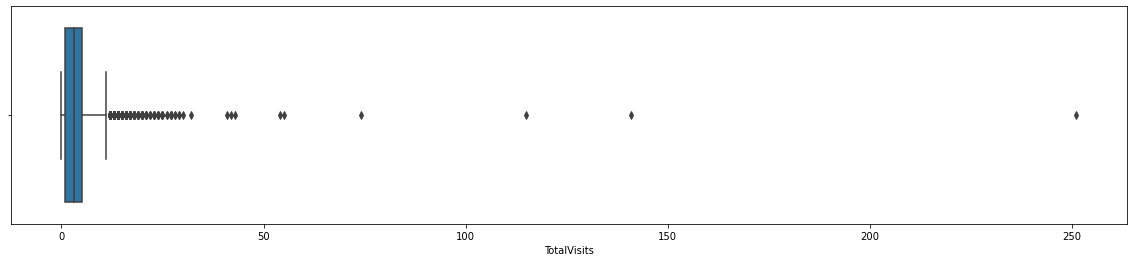

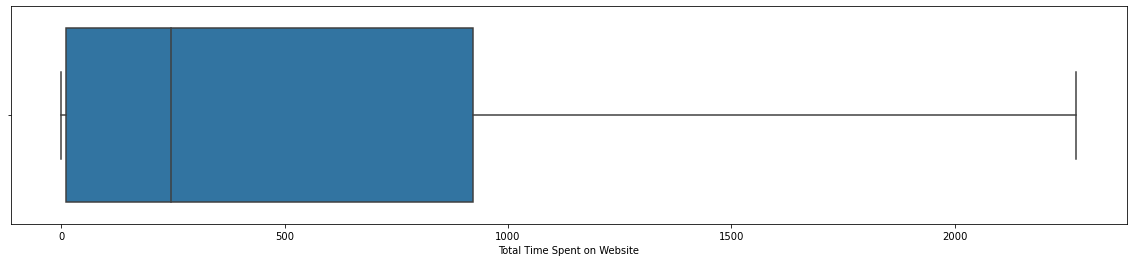

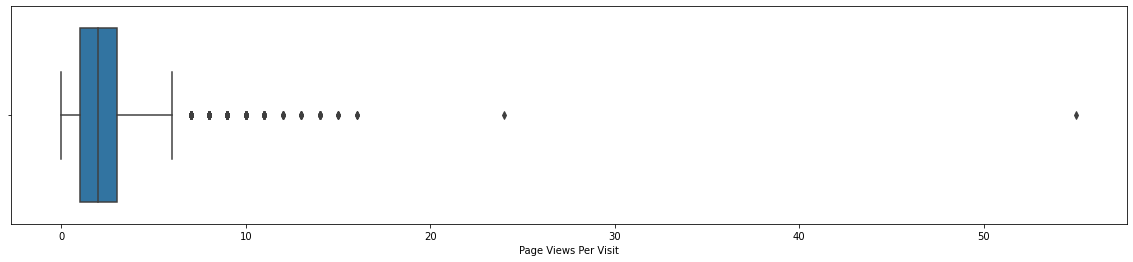

In [505]:
# plotting box plot for all numeric variables except 'Converted' variable as it is a binary variable
for i in ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']:
    plt.figure(figsize = [20,4]) 
    sns.boxplot(leads[i])

In [506]:
leads[['TotalVisits','Page Views Per Visit']].describe([0,0.2,0.4,0.8,0.9,0.95,0.99,0.993,0.995,0.996,0.997])    
# checking data for different percentiles 

,TotalVisits,Page Views Per Visit
count,9074.000000,9074.000000
mean,3.456028,2.300749
std,4.858802,2.165536
min,0.000000,0.000000
0%,0.000000,0.000000
20%,0.000000,0.000000
40%,2.000000,2.000000
50%,3.000000,2.000000
80%,5.000000,4.000000
90%,7.000000,5.000000


## Insights<hr>

* from above boxplots we can infer that `Total Time Spent on Website` variable has no statistical outliers
* the variables `TotalVisits` and `Page Views Per Visit` have many statistical outliers.<br>From the above statistical summary of `TotalVisits` and `Page Views Per Visit` variables we can observe that both the variables can be capped at 99.3rd percentile

In [507]:
# capping data in `TotalVisits` and `Page Views Per Visit` variables at 99.3th percentile          
leads = leads[leads.TotalVisits <= leads.TotalVisits.quantile(0.993)]
leads = leads[leads['Page Views Per Visit']<=leads['Page Views Per Visit'].quantile(0.993)]

In [508]:
leads.describe([.99,.993,.999])
# Looking at statistical summary of leads dataset again

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8971.000000,8971.000000,8971.000000,8971.000000
mean,0.378330,3.211348,480.436406,2.229740
std,0.484998,3.020172,544.643586,1.936377
min,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,243.000000,2.000000
99%,1.000000,14.000000,1839.000000,8.000000
99.3%,1.000000,15.000000,1874.420000,9.000000
99.9%,1.000000,18.030000,2112.150000,10.000000
max,1.000000,19.000000,2272.000000,10.000000


# EDA

### <i><b>Numerical variable</b></i>

###### Imbalance analysis - Converted column

In [509]:
imbalance = leads.Converted.value_counts(normalize = True).reset_index()
imbalance  # creating an imbalance dataframe 

,index,Converted
0,0,0.62167
1,1,0.37833


In [510]:
# Plotting histogram of Coverted variable to check data imbalance
px.bar(imbalance, x='index',y='Converted', color=['Not Converted','Converted'], title='Imbalance Analysis of Converted variable', text=['Not Converted','Converted'])   

## Insight<hr>

Only 38% of total leads have been converted whereas 62% are not converted

###### Creating segmented datasets to analyze variables with respect to customers which were converted or not converted

In [511]:
# creating segmented datasets wrt Converted variable
not_converted = leads[leads.Converted==0]
converted = leads[leads.Converted==1]

In [512]:
# defining a function which plots segmented distplots of numerical variables
def segmented_distplot(col_name):
    fig = plt.figure(figsize=(9,5))

    sns.distplot(not_converted[col_name], hist=False, color='r',label ="Not Converted", hist_kws={'width':10}) # displot representing customers which didn't convert  
    sns.distplot(converted[col_name], hist=False, color='g', label ="Converted")  # distplot representing customers which were converted 
    plt.title(f'Segmented analysis of {col_name}', fontdict={'fontsize' : 15, 'fontweight' : 3, 'color' : 'dodgerblue'})
    
    plt.legend(bbox_to_anchor=[0.8,0.9], prop={'size':12})  # legend
    plt.show()

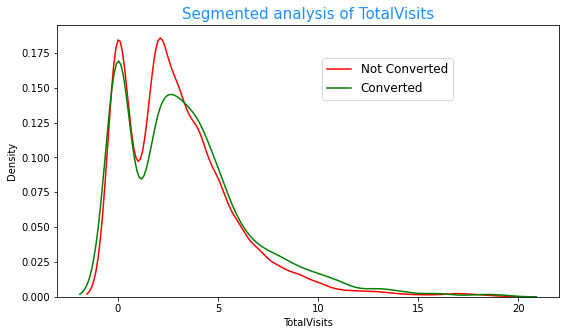

In [513]:
# Segmented analysis of TotalVisits variable
segmented_distplot('TotalVisits')

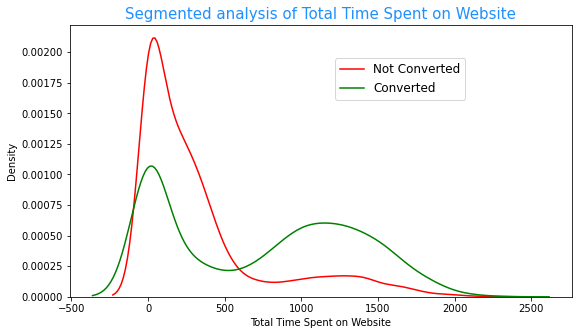

In [514]:
# Segmented analysis of 'Total Time Spent on Website' variable
segmented_distplot('Total Time Spent on Website')

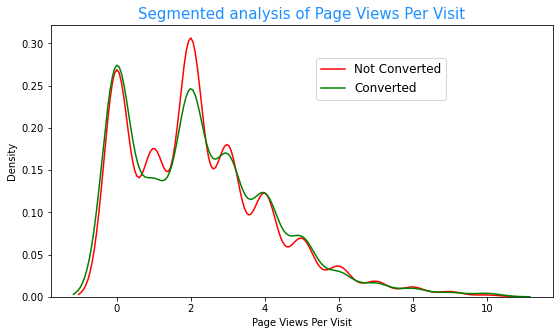

In [515]:
# Segmented analysis of 'Page Views Per Visit' variable
segmented_distplot('Page Views Per Visit')

## Inference<hr>

* From Above graphs we can observe that people which spend more time(about 10 Minutes or more) on the   website are more likely to convert than those which spend less than 10 mins on website
* for other numerical features(`TotalVisits` and `Page Views Per Visit`), there is not a significant divide between converted/ not-converted customers, but we can infer more the pages viewed by customer per visit more is the chance of him being converted
* same is for TotalVisits; if a customer visits the website more than 3 times, he's chances of genting converted is slightly higher

### <i><b>Categorical Variables</b></i>

In [516]:
# defining a fuction which plots countplot of given categorical variable while also annotating each bar
def countplot(col_name):
    plt.figure(figsize = [12,7])  # figure size
    plot = sns.countplot(x= col_name, data= leads, hue= 'Converted')   # for plotting countplot
    for p in plot.patches:     # annotating each bar in countplot
        plot.annotate(format(p.get_height()),(p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center',    
                       xytext=(0,7),textcoords='offset points')
    plt.title(f'Segmented analysis of \'{col_name}\' variable', fontsize =20, color= 'mediumturquoise') # title
    plt.xlabel(col_name, fontsize = 15)  #xlabel

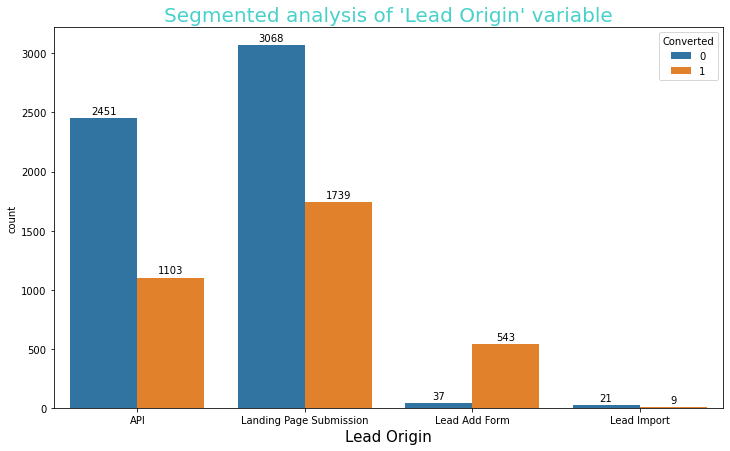

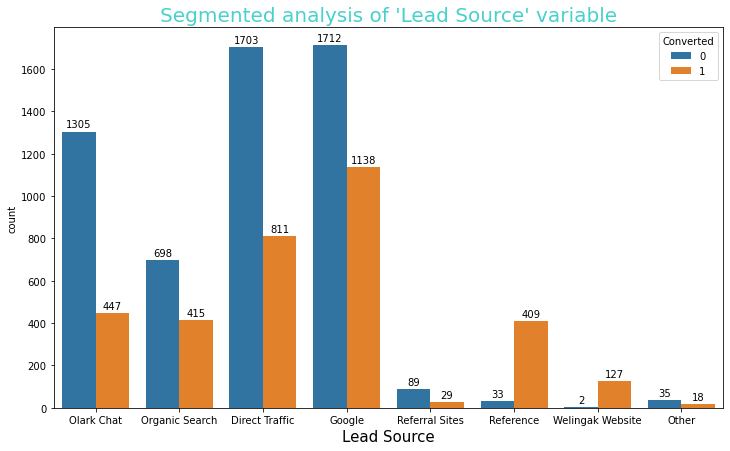

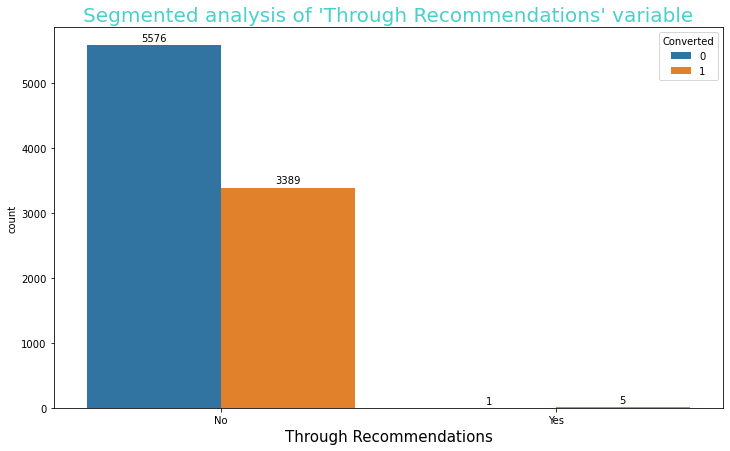

In [517]:
# ploting countplots of 'Lead Origin','Lead Source','Through Recommendations'] variables
for i in ['Lead Origin','Lead Source','Through Recommendations']:
    countplot(i)
    plt.show()

## Insights<hr>

* In `Lead Origin` column `Lead Add Form Lead Origin` category has the highest conversion rate, greater than $92$%
* In `Lead Source` column two categories have the highest conversion rates, that are `Welingak Website`(almost $98$%) and `Lead Add Form Lead Origin`(almost $92$%)
* In `Through Recommendations` column `Yes` category though having very few entries, has the highest conversion rate, greater than $83$%

## Inference<hr>

* Leads generated from `reference`, `Welingak Website` and `Lead Add Form Lead Origin` can be considered as hot leads as the conversion rate is more than $90$% 
* Leads which came through recommendation of other customers can also be considered as hot leads due to high conversion rate

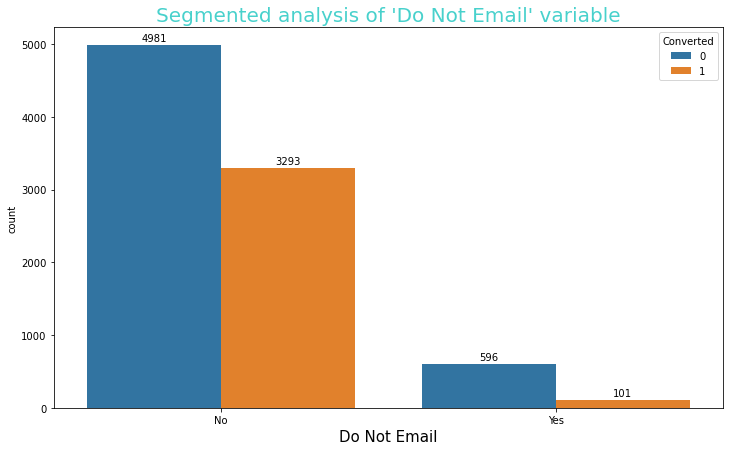

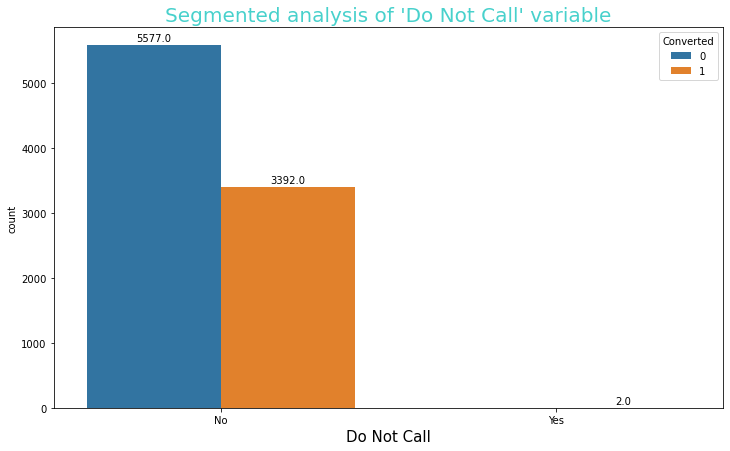

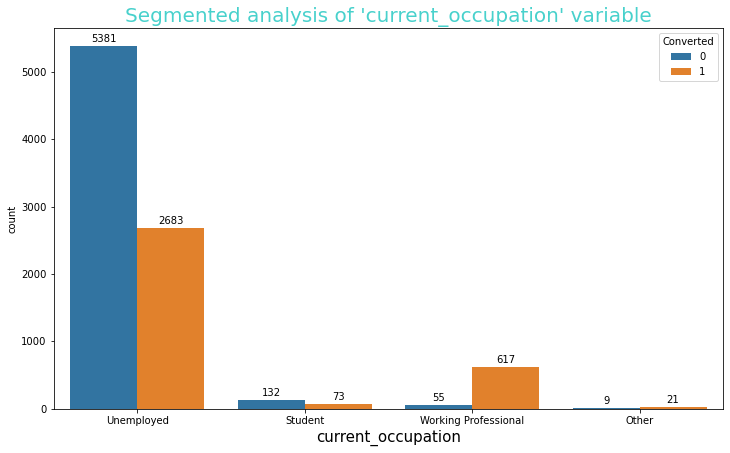

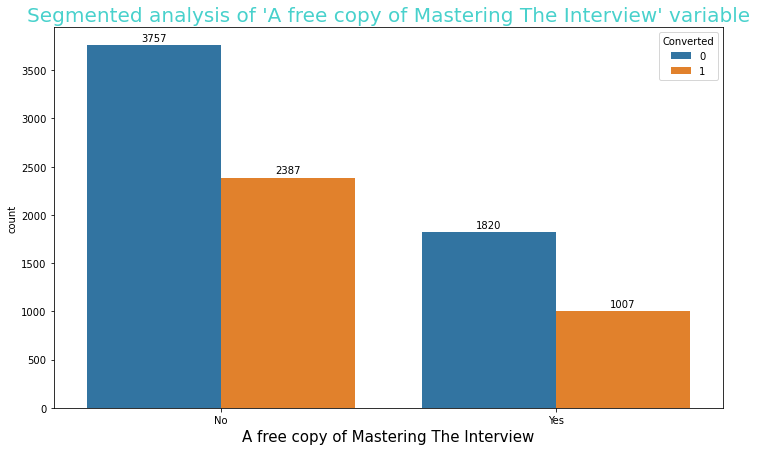

In [518]:
# ploting countplots of 'Do Not Email','Do Not Call','current_occupation',''A free copy of Mastering The Interview'' variables
for i in ['Do Not Email','Do Not Call','current_occupation','A free copy of Mastering The Interview']:
    countplot(i)
    plt.show()

## Insights<hr>

* In `Do Not Email` column major conversion(about $40$%) has happened when customer opted for it
* In `Do Not call` column major conversion(about $38$%) has happened when customer opted for it<br>Also though only 2 customers opted to not get a call they both got coverted
* In `current_occupation` column `Working Professional` category has the highest conversion rate, greater than $67$% followed by `Other` category having conversion rate of $60$% 
* Customers which don't opt for a free copy of Mastering the Interview have a slightly high conversion rate(about $40$%) than customers which opt for it(about $35$%)

## Inference<hr>

* Working Professionals are most likely to convert

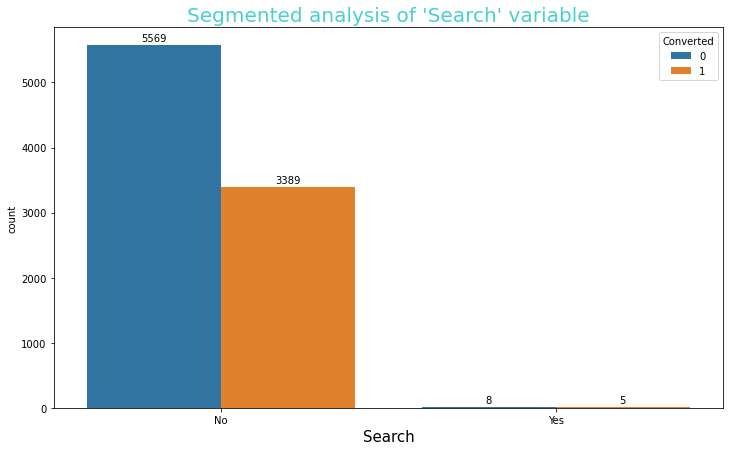

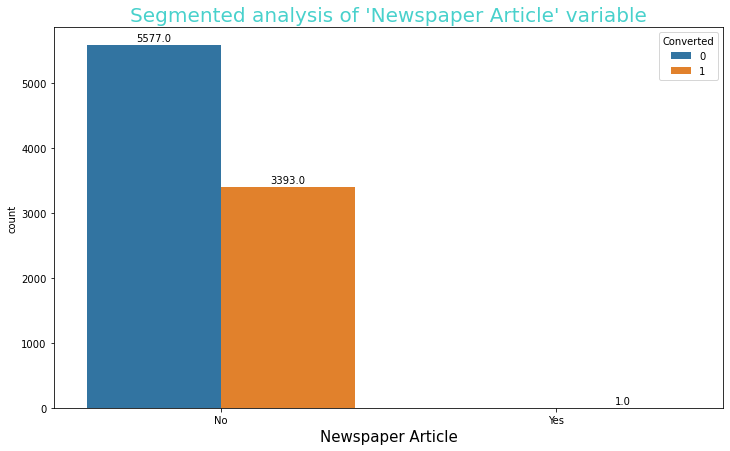

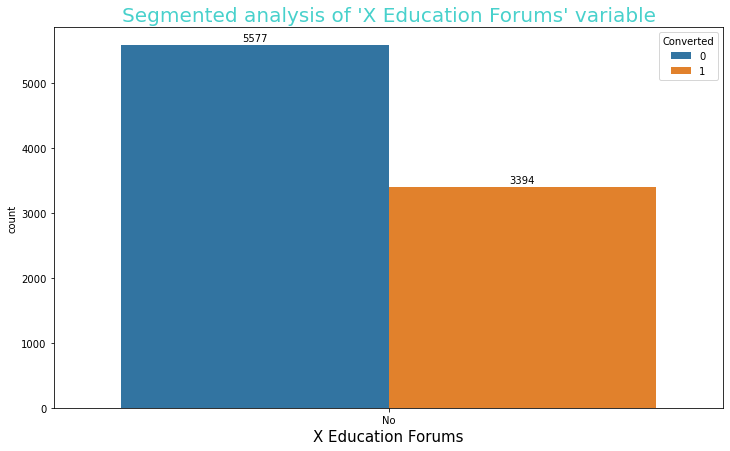

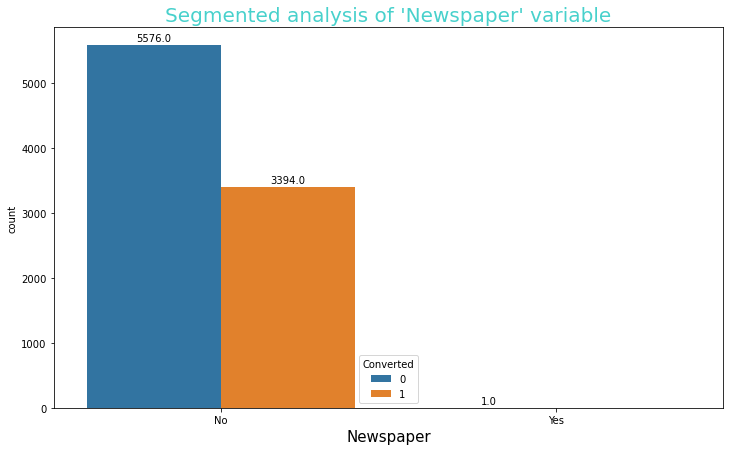

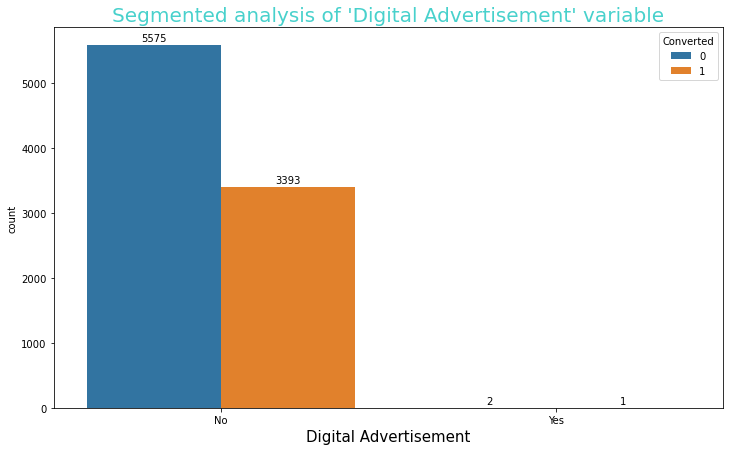

In [519]:
# ploting countplots of 'Search','Newspaper Article','X Education Forums' variables
for i in ['Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement']:
    countplot(i)
    plt.show()

## Insights<hr>

* About 99% of customers hadn't seen any ad through above given channels
* All the columns above have about $38$% conversion rate for the category 'No'

###### All the above analyzed columns(`Search`,`Newspaper Article`,`X Education Forums`,`Newspaper`,`Digital Advertisement`)  have very highly skewed data with `X Education Forums` having only one category<br>As these columns don't contribute anything significant to our analysis we can drop them

In [520]:
# dropping above mentioned columns
leads.drop(['Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement'], axis= 1, inplace= True)   

In [521]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'current_occupation',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

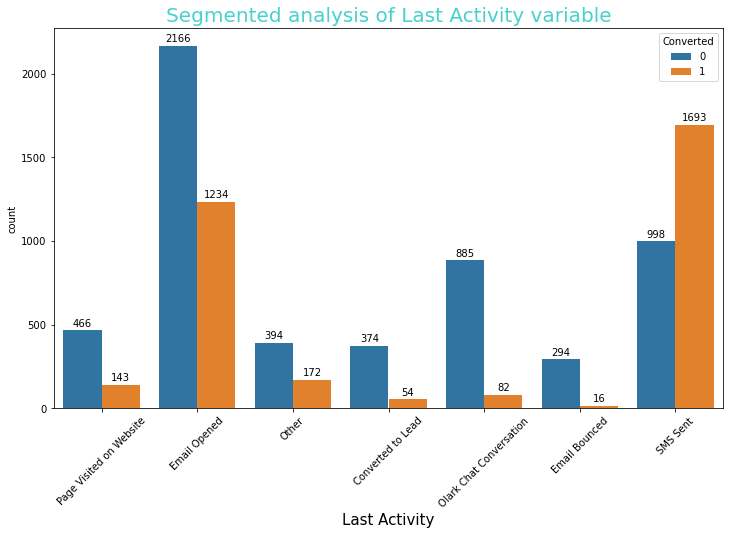

In [522]:
# ploting countplots of 'Last Activity' differently as xticks had to be rotated
plt.figure(figsize = [12,7])  # figure size
plot = sns.countplot(x= 'Last Activity', data= leads, hue= 'Converted')   # for plotting countplot
for p in plot.patches:     # annotating each bar in countplot
    plot.annotate(format(p.get_height()),(p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center',    
                  xytext=(0,7),textcoords='offset points')
plt.title(f'Segmented analysis of Last Activity variable', fontsize =20, color= 'mediumturquoise') # title
plt.xlabel('Last Activity', fontsize = 15)  #xlabel
plt.xticks(rotation = 45)
plt.show()

## Insights<hr>

* In `Last Activity` column  `SMS Sent` category has the highest conversion rate of $63$% while `Olark Chat Conversation` and `Email Bounced` categories have the lowest conversion rates of $9$% and $8$%

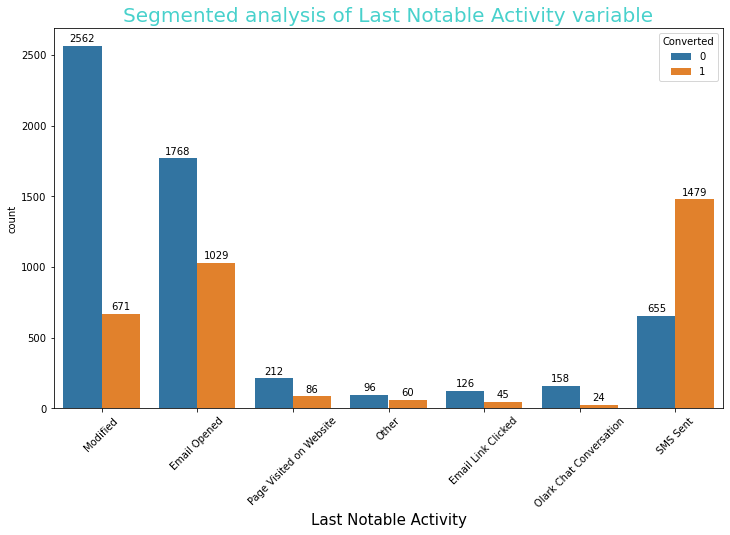

In [523]:
# ploting countplots of 'Last Notable Activity' differently as xticks had to be rotated
plt.figure(figsize = [12,7])  # figure size
plot = sns.countplot(x= 'Last Notable Activity', data= leads, hue= 'Converted')   # for plotting countplot
for p in plot.patches:     # annotating each bar in countplot
    plot.annotate(format(p.get_height()),(p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center',    
                    xytext=(0,7),textcoords='offset points')
plt.title(f'Segmented analysis of Last Notable Activity variable', fontsize =20, color= 'mediumturquoise') # title
plt.xlabel('Last Notable Activity', fontsize = 15)  #xlabel
plt.xticks(rotation = 45)
plt.show()

## Insights<hr>

* In `Last Notable Activity` column `SMS Sent` category has the highest conversion rate of about $70$%

# Data Preparation

In [524]:
leads.nunique()

Lead Origin                                  4
Lead Source                                  8
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
TotalVisits                                 20
Total Time Spent on Website               1710
Page Views Per Visit                        11
Last Activity                                7
current_occupation                           4
Through Recommendations                      2
A free copy of Mastering The Interview       2
Last Notable Activity                        7
dtype: int64

In [525]:
# creating dataframe leads_df which contains only costomer generated columns and not sales team generated column
leads_df = leads.drop(['Last Activity','Last Notable Activity'], axis= 1)
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,current_occupation,Through Recommendations,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0,0,0,Unemployed,No,No
1,API,Organic Search,No,No,0,5,674,2,Unemployed,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2,1532,2,Student,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1,305,1,Unemployed,No,No
4,Landing Page Submission,Google,No,No,1,2,1428,1,Unemployed,No,No


In [526]:
leads_df.dtypes

Lead Origin                               object
Lead Source                               object
Do Not Email                              object
Do Not Call                               object
Converted                                  int64
TotalVisits                                int64
Total Time Spent on Website                int64
Page Views Per Visit                       int64
current_occupation                        object
Through Recommendations                   object
A free copy of Mastering The Interview    object
dtype: object

In [527]:
leads_df.nunique()

Lead Origin                                  4
Lead Source                                  8
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
TotalVisits                                 20
Total Time Spent on Website               1710
Page Views Per Visit                        11
current_occupation                           4
Through Recommendations                      2
A free copy of Mastering The Interview       2
dtype: int64

###### Converting categorical variables with 2 categories to binary numerical variables

In [528]:
for i in leads_df:
    if leads_df[i].nunique()== 2 and leads_df[i].dtype== 'object':
        leads_df[i].replace(['Yes','No'],[1,0], inplace= True)

In [529]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,current_occupation,Through Recommendations,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0,0,0,0,Unemployed,0,0
1,API,Organic Search,0,0,0,5,674,2,Unemployed,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2,1532,2,Student,0,1
3,Landing Page Submission,Direct Traffic,0,0,0,1,305,1,Unemployed,0,0
4,Landing Page Submission,Google,0,0,1,2,1428,1,Unemployed,0,0


In [530]:
leads_df.dtypes

Lead Origin                               object
Lead Source                               object
Do Not Email                               int64
Do Not Call                                int64
Converted                                  int64
TotalVisits                                int64
Total Time Spent on Website                int64
Page Views Per Visit                       int64
current_occupation                        object
Through Recommendations                    int64
A free copy of Mastering The Interview     int64
dtype: object

### <b><i>Dummy Variable Creation</i></b>

In [531]:
leads_df = pd.get_dummies(data = leads_df, columns=['Lead Origin','Lead Source','current_occupation'])

In [532]:
leads_df.sample()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,current_occupation_Other,current_occupation_Student,current_occupation_Unemployed,current_occupation_Working Professional
905,0,0,0,2,271,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


###### Dropping `Lead Origin_Quick Add Form` dummy column from `Lead Origin` ,<br>`Lead Source_Other` dummy column from `Lead Source` and <br>`current_occupation_Other` dummy column from `current occupation` as these columns have very few entries in the entire dataset compaired to other dummy variables in 

In [533]:
leads_df.drop(['Lead Origin_Lead Import','Lead Source_Other','current_occupation_Other'], axis= 1, inplace= True)   

In [534]:
leads_df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,current_occupation_Student,current_occupation_Unemployed,current_occupation_Working Professional
0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,5,674,2,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,1,2,1532,2,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0,0,0,1,305,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
4,0,0,1,2,1428,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0


In [535]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8971 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Do Not Email                             8971 non-null   int64
 1   Do Not Call                              8971 non-null   int64
 2   Converted                                8971 non-null   int64
 3   TotalVisits                              8971 non-null   int64
 4   Total Time Spent on Website              8971 non-null   int64
 5   Page Views Per Visit                     8971 non-null   int64
 6   Through Recommendations                  8971 non-null   int64
 7   A free copy of Mastering The Interview   8971 non-null   int64
 8   Lead Origin_API                          8971 non-null   uint8
 9   Lead Origin_Landing Page Submission      8971 non-null   uint8
 10  Lead Origin_Lead Add Form                8971 non-null   uint8
 11  Lead

### <b><i>Train-Test Split</i></b>

In [536]:
X = leads_df.drop('Converted', axis=1)
y = leads['Converted']

In [537]:
from sklearn.model_selection import train_test_split

In [538]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size =0.7, random_state= 100)

In [539]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# we have 70% data in train dataset and 30% data in test dataset same goes for y variable

((6279, 20), (2692, 20), (6279,), (2692,))

In [540]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,current_occupation_Student,current_occupation_Unemployed,current_occupation_Working Professional
count,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000
mean,0.075808,0.000159,3.226469,482.893773,2.245262,0.000637,0.314859,0.394330,0.538143,0.064023,0.283166,0.317089,0.193980,0.124383,0.046823,0.012422,0.015926,0.023411,0.900462,0.072305
std,0.264712,0.012620,3.009065,545.216457,1.948047,0.025234,0.464497,0.488745,0.498583,0.244813,0.450572,0.465379,0.395445,0.330044,0.211276,0.110770,0.125200,0.151218,0.299407,0.259012
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,3.000000,245.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,5.000000,930.500000,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,19.000000,2253.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### <b><i>Feature Scaling</i></b>

In [541]:
from sklearn.preprocessing import StandardScaler

In [542]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(
                            X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])   
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,current_occupation_Student,current_occupation_Unemployed,current_occupation_Working Professional
3832,0,0,-0.407624,-0.058502,-0.125912,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
3318,0,0,-1.072335,-0.885762,-1.152663,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
5529,0,0,-1.072335,-0.885762,-1.152663,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
5185,0,0,-0.407624,0.095577,-0.125912,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
6522,0,0,-1.072335,-0.885762,-1.152663,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0


In [543]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,current_occupation_Student,current_occupation_Unemployed,current_occupation_Working Professional
count,6279.000000,6279.000000,6.279000e+03,6.279000e+03,6.279000e+03,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000
mean,0.075808,0.000159,-6.661515e-17,5.117034e-17,3.041886e-16,0.000637,0.314859,0.394330,0.538143,0.064023,0.283166,0.317089,0.193980,0.124383,0.046823,0.012422,0.015926,0.023411,0.900462,0.072305
std,0.264712,0.012620,1.000080e+00,1.000080e+00,1.000080e+00,0.025234,0.464497,0.488745,0.498583,0.244813,0.450572,0.465379,0.395445,0.330044,0.211276,0.110770,0.125200,0.151218,0.299407,0.259012
min,0.000000,0.000000,-1.072335e+00,-8.857624e-01,-1.152663e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-7.399796e-01,-8.655853e-01,-6.392871e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,-7.526831e-02,-4.363638e-01,-1.259115e-01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,5.894430e-01,8.210351e-01,3.874641e-01,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,5.242422e+00,3.246870e+00,3.981093e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [544]:
### Checking the Conversion Rate percentage
converted = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
converted

37.83301750083602

###### We have about 38% conversion rate

### <b><i>Looking at Correlation</i></b>

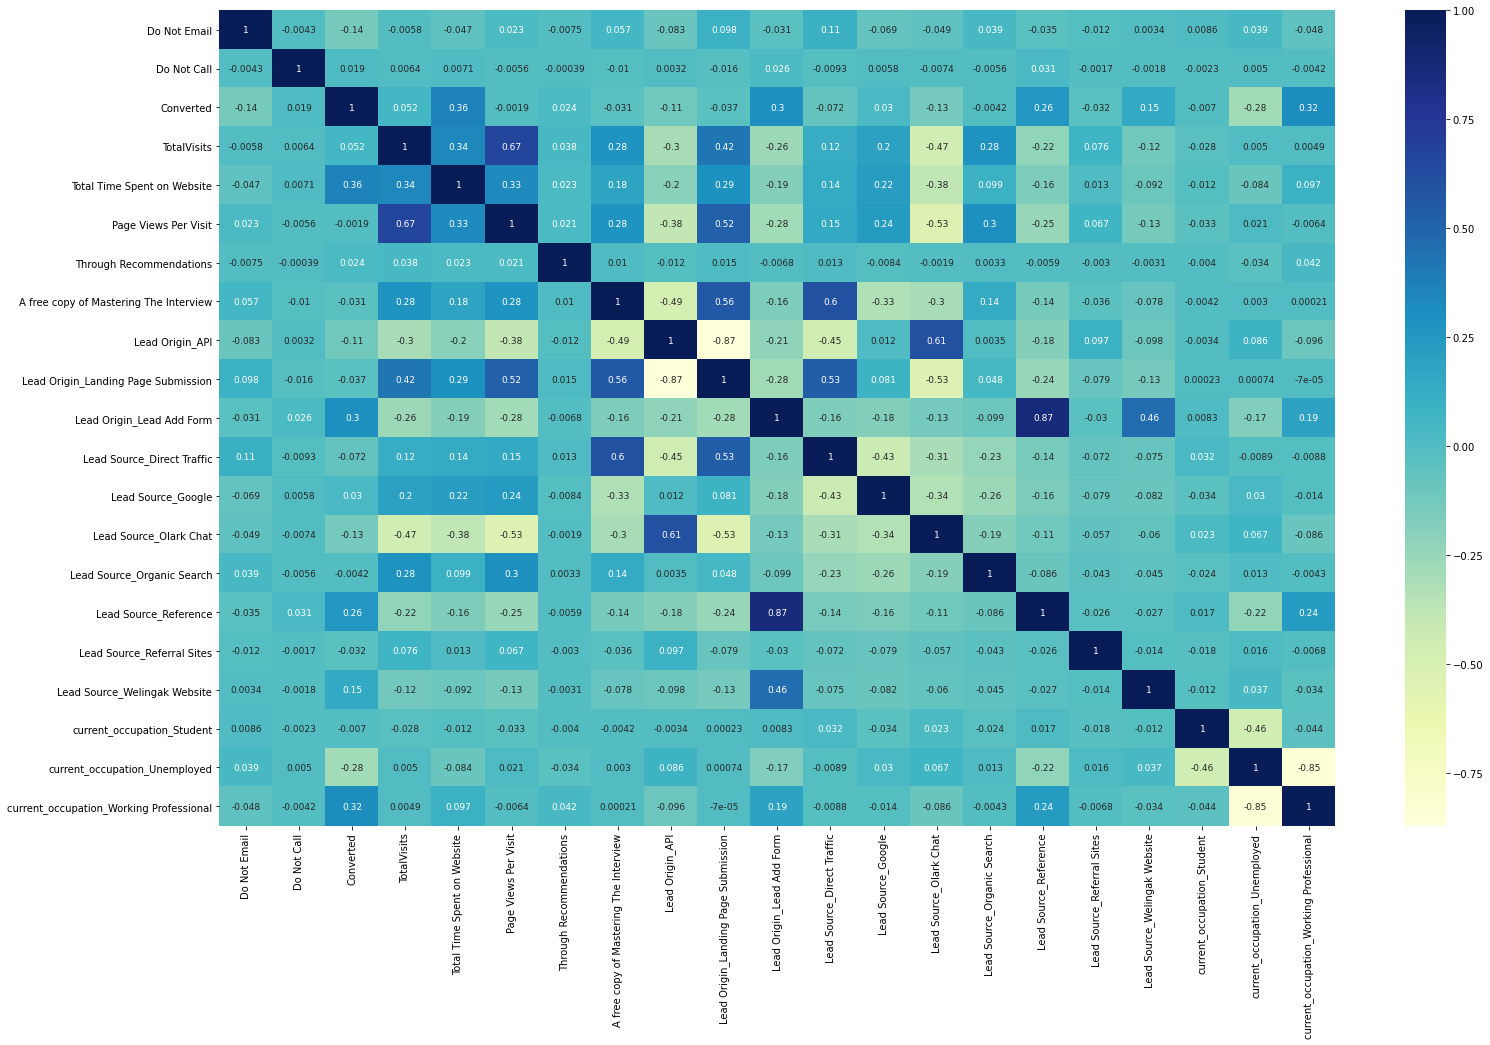

In [545]:
plt.figure(figsize = [25,15])
sns.heatmap(leads_df.corr(), annot=  True, cmap= 'YlGnBu', annot_kws={'size':9}, fmt= '.2g')
plt.show()

## Inference<hr>

* <b>Variables having a good positive correlation with `converted` variable</b>
   
     * current_occupation_Working Professional ($0.22$)
     * Lead Source_Reference ($0.27$)
     * Lead Origin_Lead Add Form ($0.32$)
     * Total Time Spent on Website ($0.36$)<br><br>


### <b><i>Model Building</i></b>

In [546]:
# importing required libraries
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [547]:
# Instantiating a logistic regression object
logreg = LogisticRegression() 

###### Defining a function which builds a logistic regression model using variables in given dataframe

In [548]:
def logistic_reg_model(X):
    X_train_sm = sm.add_constant(X)
    log_model = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
    global res 
    res = log_model.fit()
    print(res.summary())

###### Defining a function which calculates and prints VIF of each variable of a corresponding model

In [549]:
def VIF_calculator(X):
    vif = pd.DataFrame()
    vif['features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif.VIF, 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    print(vif)
# creating a dataframe consisting of variables and their corresponding VIF

#### Model 1

In [550]:
# building first model using all variables
X1 = X_train.copy()
logistic_reg_model(X1)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6279
Model:                            GLM   Df Residuals:                     6258
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2966.8
Date:                Tue, 10 May 2022   Deviance:                       5933.5
Time:                        19:35:18   Pearson chi2:                 6.32e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

## Insight<hr>
* We have many variables which have a VIF greater than 0.05, so using RFE to top 18 features<br>Then we will use p-value and VIF to eliminate redudant features

In [551]:
# importing RFE
from sklearn.feature_selection import RFE

In [552]:
rfe = RFE(logreg, 18) # selecting 18 features using RFE
rfe = rfe.fit(X_train, y_train)

In [553]:
# checking rfe support and ranking for each column
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Through Recommendations', True, 1),
 ('A free copy of Mastering The Interview', False, 3),
 ('Lead Origin_API', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('current_occupation_Student', True, 1),
 ('current_occupation_Unemployed', True, 1),
 ('current_occupation_Working Professional', True, 1)]

In [554]:
cols = X_train.columns[rfe.support_]
# creating cols varaible containing all column names which rfe has selected

#### Model 2

In [555]:
# building 2nd model using all features selected by rfe
X2 = X_train[cols]
logistic_reg_model(X2)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6279
Model:                            GLM   Df Residuals:                     6260
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2967.0
Date:                Tue, 10 May 2022   Deviance:                       5933.9
Time:                        19:35:18   Pearson chi2:                 6.33e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [556]:
#vchecking vif of model 2
VIF_calculator(X2)

                                   features     VIF
6       Lead Origin_Landing Page Submission  319.30
5                           Lead Origin_API  234.09
9                        Lead Source_Google  144.58
8                Lead Source_Direct Traffic  129.53
16            current_occupation_Unemployed  124.45
10                   Lead Source_Olark Chat   89.59
7                 Lead Origin_Lead Add Form   63.21
11               Lead Source_Organic Search   57.40
12                    Lead Source_Reference   40.96
14             Lead Source_Welingak Website   14.55
17  current_occupation_Working Professional   10.90
13               Lead Source_Referral Sites    6.65
15               current_occupation_Student    4.23
2                               TotalVisits    1.61
3               Total Time Spent on Website    1.31
0                              Do Not Email    1.11
1                               Do Not Call    1.00
4                   Through Recommendations    1.00


## Insight<hr>
* We have quite a few variables having both high p-value as well as high VIF
* Firstly eliminating `Do Not Call` feature as it has a p-value of 0.999 which means the model consideres this variables almost insignificant

#### Model 3

In [557]:
X3 = X2.drop('Do Not Call', axis= 1)
logistic_reg_model(X3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6279
Model:                            GLM   Df Residuals:                     6261
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2967.1
Date:                Tue, 10 May 2022   Deviance:                       5934.2
Time:                        19:35:18   Pearson chi2:                 6.33e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [558]:
VIF_calculator(X3)

                                   features     VIF
5       Lead Origin_Landing Page Submission  319.30
4                           Lead Origin_API  234.09
8                        Lead Source_Google  144.58
7                Lead Source_Direct Traffic  129.53
15            current_occupation_Unemployed  124.45
9                    Lead Source_Olark Chat   89.59
6                 Lead Origin_Lead Add Form   63.21
10               Lead Source_Organic Search   57.40
11                    Lead Source_Reference   40.96
13             Lead Source_Welingak Website   14.55
16  current_occupation_Working Professional   10.90
12               Lead Source_Referral Sites    6.65
14               current_occupation_Student    4.23
1                               TotalVisits    1.61
2               Total Time Spent on Website    1.31
0                              Do Not Email    1.11
3                   Through Recommendations    1.00


## Insight<hr>
* We have quite a few variables having VIF above 100
* Dropping `Lead Source_Olark Chat` variable as it has the 2nd highest p-value and also a VIF greater than 89

#### Model 4

In [559]:
X4 = X3.drop('Lead Source_Olark Chat', axis= 1)
logistic_reg_model(X4)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6279
Model:                            GLM   Df Residuals:                     6262
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2967.2
Date:                Tue, 10 May 2022   Deviance:                       5934.4
Time:                        19:35:18   Pearson chi2:                 6.33e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [560]:
VIF_calculator(X4)

                                   features     VIF
14            current_occupation_Unemployed  124.45
5       Lead Origin_Landing Page Submission   80.85
6                 Lead Origin_Lead Add Form   59.06
4                           Lead Origin_API   55.87
10                    Lead Source_Reference   37.90
12             Lead Source_Welingak Website   13.52
15  current_occupation_Working Professional   10.90
7                Lead Source_Direct Traffic    5.17
8                        Lead Source_Google    4.40
13               current_occupation_Student    4.23
9                Lead Source_Organic Search    2.54
1                               TotalVisits    1.61
2               Total Time Spent on Website    1.30
11               Lead Source_Referral Sites    1.12
0                              Do Not Email    1.11
3                   Through Recommendations    1.00


## Insight<hr>
* `Lead Source_Reference` has the highest p-value as well as VIF greater than 37. so dropping this column from our model

#### Model 5

In [561]:
X5 = X4.drop('Lead Source_Reference', axis= 1)
logistic_reg_model(X5)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6279
Model:                            GLM   Df Residuals:                     6263
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2967.3
Date:                Tue, 10 May 2022   Deviance:                       5934.5
Time:                        19:35:19   Pearson chi2:                 6.32e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [562]:
VIF_calculator(X5)

                                   features     VIF
13            current_occupation_Unemployed  124.44
5       Lead Origin_Landing Page Submission   80.85
4                           Lead Origin_API   55.86
14  current_occupation_Working Professional   10.89
6                 Lead Origin_Lead Add Form   10.05
7                Lead Source_Direct Traffic    5.17
8                        Lead Source_Google    4.40
12               current_occupation_Student    4.23
9                Lead Source_Organic Search    2.54
1                               TotalVisits    1.61
11             Lead Source_Welingak Website    1.36
2               Total Time Spent on Website    1.30
10               Lead Source_Referral Sites    1.12
0                              Do Not Email    1.11
3                   Through Recommendations    1.00


## Insight<hr>

* Dropping `Lead Origin_API` variable as it has very high p-value and also a VIF greater than 55

#### model 6

In [563]:
X6 = X5.drop('Lead Origin_API', axis= 1)
logistic_reg_model(X6)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6279
Model:                            GLM   Df Residuals:                     6264
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2967.4
Date:                Tue, 10 May 2022   Deviance:                       5934.7
Time:                        19:35:19   Pearson chi2:                 6.32e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [564]:
VIF_calculator(X6)

                                   features   VIF
12            current_occupation_Unemployed  6.29
6                Lead Source_Direct Traffic  5.09
4       Lead Origin_Landing Page Submission  4.60
7                        Lead Source_Google  4.32
8                Lead Source_Organic Search  2.50
5                 Lead Origin_Lead Add Form  1.73
1                               TotalVisits  1.61
13  current_occupation_Working Professional  1.53
10             Lead Source_Welingak Website  1.36
2               Total Time Spent on Website  1.30
11               current_occupation_Student  1.13
9                Lead Source_Referral Sites  1.12
0                              Do Not Email  1.11
3                   Through Recommendations  1.00


## Insight<hr>
* Dropping `Lead Origin_API` variable increased the p-value of `Lead Origin_Landing Page Submission` variable to more than 0.8
* As it also has high VIF compared to other variables, so we can drop `Lead Origin_Landing Page Submission`

#### Model 7

In [565]:
X7 = X6.drop('Lead Origin_Landing Page Submission', axis= True)
logistic_reg_model(X7)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6279
Model:                            GLM   Df Residuals:                     6265
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2967.4
Date:                Tue, 10 May 2022   Deviance:                       5934.8
Time:                        19:35:19   Pearson chi2:                 6.32e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [566]:
VIF_calculator(X7)

                                   features   VIF
11            current_occupation_Unemployed  6.26
6                        Lead Source_Google  3.64
5                Lead Source_Direct Traffic  3.27
7                Lead Source_Organic Search  2.27
4                 Lead Origin_Lead Add Form  1.73
1                               TotalVisits  1.57
12  current_occupation_Working Professional  1.52
9              Lead Source_Welingak Website  1.36
2               Total Time Spent on Website  1.30
10               current_occupation_Student  1.13
8                Lead Source_Referral Sites  1.12
0                              Do Not Email  1.11
3                   Through Recommendations  1.00


## Insight<hr>
* Dropping `Through Recommendations` variable as it has a very high p-value

#### model 8

In [567]:
X8 = X7.drop('Through Recommendations', axis= 1)
logistic_reg_model(X8)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6279
Model:                            GLM   Df Residuals:                     6266
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2967.5
Date:                Tue, 10 May 2022   Deviance:                       5935.1
Time:                        19:35:19   Pearson chi2:                 6.33e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [568]:
VIF_calculator(X8)

                                   features   VIF
10            current_occupation_Unemployed  6.26
5                        Lead Source_Google  3.64
4                Lead Source_Direct Traffic  3.27
6                Lead Source_Organic Search  2.27
3                 Lead Origin_Lead Add Form  1.73
1                               TotalVisits  1.56
11  current_occupation_Working Professional  1.52
8              Lead Source_Welingak Website  1.36
2               Total Time Spent on Website  1.30
9                current_occupation_Student  1.13
7                Lead Source_Referral Sites  1.12
0                              Do Not Email  1.11


## Insight<hr>
* `current_occupation_Student` variable has the highest p-value so dropping it and building the model again

#### model 9

In [569]:
X9 = X8.drop('current_occupation_Student', axis= 1)
logistic_reg_model(X9)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6279
Model:                            GLM   Df Residuals:                     6267
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2968.4
Date:                Tue, 10 May 2022   Deviance:                       5936.7
Time:                        19:35:19   Pearson chi2:                 6.33e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [570]:
VIF_calculator(X9)

                                   features   VIF
9             current_occupation_Unemployed  5.68
5                        Lead Source_Google  3.33
4                Lead Source_Direct Traffic  2.96
6                Lead Source_Organic Search  2.13
3                 Lead Origin_Lead Add Form  1.69
1                               TotalVisits  1.52
10  current_occupation_Working Professional  1.46
8              Lead Source_Welingak Website  1.36
2               Total Time Spent on Website  1.29
0                              Do Not Email  1.11
7                Lead Source_Referral Sites  1.11


## Insight<hr>
* `current_occupation_Unemployed` variable has the highest p-value as well as high VIF so dropping it and building the model again

#### model 10

In [571]:
X10 = X9.drop('current_occupation_Unemployed', axis= 1)
logistic_reg_model(X10)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6279
Model:                            GLM   Df Residuals:                     6268
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2968.9
Date:                Tue, 10 May 2022   Deviance:                       5937.9
Time:                        19:35:19   Pearson chi2:                 6.33e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [572]:
VIF_calculator(X10)

                                  features   VIF
3                Lead Origin_Lead Add Form  1.54
8             Lead Source_Welingak Website  1.36
1                              TotalVisits  1.30
2              Total Time Spent on Website  1.20
9  current_occupation_Working Professional  1.15
4               Lead Source_Direct Traffic  1.12
6               Lead Source_Organic Search  1.12
0                             Do Not Email  1.11
5                       Lead Source_Google  1.09
7               Lead Source_Referral Sites  1.01


## Insights<hr>
* All p-values are less than 0.05 i.e all variables are significant
* All variables have VIF's in accecptable range

###### Now adding few variables one by one to see if we can improve the efficiency of model<br> if not Model 10 will be our final model

#### Model 11

In [573]:
X11 = pd.concat([X10,X1['Lead Source_Reference']], axis= 1)
logistic_reg_model(X11)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6279
Model:                            GLM   Df Residuals:                     6267
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2968.9
Date:                Tue, 10 May 2022   Deviance:                       5937.8
Time:                        19:35:20   Pearson chi2:                 6.33e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [574]:
VIF_calculator(X11)

                                   features    VIF
3                 Lead Origin_Lead Add Form  50.26
10                    Lead Source_Reference  37.89
8              Lead Source_Welingak Website  13.51
1                               TotalVisits   1.30
2               Total Time Spent on Website   1.20
9   current_occupation_Working Professional   1.15
4                Lead Source_Direct Traffic   1.12
6                Lead Source_Organic Search   1.12
0                              Do Not Email   1.11
5                        Lead Source_Google   1.09
7                Lead Source_Referral Sites   1.01


## Insight<hr>
* After adding `Lead Source_Reference` variable to model 10 we can observe it has a very high p-value, so it is insignificant and we will drop it

#### Model 12

In [575]:
X12 = pd.concat([X10,X1['Through Recommendations']], axis= 1)
logistic_reg_model(X12)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6279
Model:                            GLM   Df Residuals:                     6267
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2968.8
Date:                Tue, 10 May 2022   Deviance:                       5937.6
Time:                        19:35:20   Pearson chi2:                 6.33e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [576]:
VIF_calculator(X12)

                                   features   VIF
3                 Lead Origin_Lead Add Form  1.54
8              Lead Source_Welingak Website  1.36
1                               TotalVisits  1.30
2               Total Time Spent on Website  1.20
9   current_occupation_Working Professional  1.15
4                Lead Source_Direct Traffic  1.12
6                Lead Source_Organic Search  1.12
0                              Do Not Email  1.11
5                        Lead Source_Google  1.09
7                Lead Source_Referral Sites  1.01
10                  Through Recommendations  1.00


## Insight<hr>
* After adding `Through Recommendationse` variable to model 10 we can observe it has a very high p-value, so it is insignificant and we will drop it
* As adding different variables to model 10 is not contributing to any additional information while staying significant, so we will choose model 10 as our final model

### Final Model (Model 10)

In [577]:
logistic_reg_model(X10)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6279
Model:                            GLM   Df Residuals:                     6268
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2968.9
Date:                Tue, 10 May 2022   Deviance:                       5937.9
Time:                        19:35:20   Pearson chi2:                 6.33e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [578]:
VIF_calculator(X10)

                                  features   VIF
3                Lead Origin_Lead Add Form  1.54
8             Lead Source_Welingak Website  1.36
1                              TotalVisits  1.30
2              Total Time Spent on Website  1.20
9  current_occupation_Working Professional  1.15
4               Lead Source_Direct Traffic  1.12
6               Lead Source_Organic Search  1.12
0                             Do Not Email  1.11
5                       Lead Source_Google  1.09
7               Lead Source_Referral Sites  1.01


# Model Evaluation

In [579]:
X_train_sm = sm.add_constant(X10)  # adding constant to final model dataframe
X_train_sm.head()

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,current_occupation_Working Professional
3832,1.0,0,-0.407624,-0.058502,0,0,1,0,0,0,0
3318,1.0,0,-1.072335,-0.885762,0,0,0,0,0,0,0
5529,1.0,0,-1.072335,-0.885762,0,0,0,0,0,0,0
5185,1.0,0,-0.407624,0.095577,0,0,1,0,0,0,0
6522,1.0,0,-1.072335,-0.885762,0,0,0,0,0,0,0


In [580]:
# predicting y values using train data set
y_train_pred = res.predict(X_train_sm)
y_train_pred.head()

3832    0.234395
3318    0.219347
5529    0.219347
5185    0.265849
6522    0.219347
dtype: float64

In [581]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:5]  # reshaping y_train_pred variable

array([0.23439492, 0.21934686, 0.21934686, 0.26584898, 0.21934686])

###### Creating a DataFrame with actual Converted flag and the predicted probabilities

In [582]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Converted_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID
0,0,0.234395,3832
1,0,0.219347,3318
2,1,0.219347,5529
3,0,0.265849,5185
4,0,0.219347,6522


###### Creating new column `predicted` with 1 if Converted_prob > 0.5 else 0

In [583]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,0,0.234395,3832,0
1,0,0.219347,3318,0
2,1,0.219347,5529,0
3,0,0.265849,5185,0
4,0,0.219347,6522,0


###### creating confusion matrix and checking accuracy score

In [584]:
from sklearn import metrics

In [585]:
# creating and checking confusion matrix for probability cutoff = 0.5
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3441,  469],
       [ 884, 1485]], dtype=int64)

In [586]:
# checking overall acurracy of model
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7845198279980888


###### The accuracy of our final model is 78% which is a good accuracy score

#### <b><i>Calculating Other required metric</i></b>

###### Calculating Sensitivity, Specificity, Precesion, Recall, False Positive Rate, etc

In [587]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [588]:
# Calcualting Senitivity (Recall)
TP/ float(TP+FN)

0.6268467707893626

In [589]:
# Calcualting specificity
TN/ float(TN+FP)

0.8800511508951406

In [590]:
# Calculate false postive rate
FP/ float(FP+TN)

0.11994884910485934

In [591]:
# Precesion (positive predictive value)
TP/ float(TP+FP)

0.7599795291709315

In [592]:
# Negative predictive value
TN/ float(TN+FN)

0.795606936416185

#### <b><i>Plotting ROC curve</i></b>

In [593]:
# defining a variable to plot ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6,6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )  # plotting ROC curve
    plt.plot([0, 1], [0, 1], 'k--')    # plotting x=y plot as reference line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [594]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob,
                                              drop_intermediate = False )

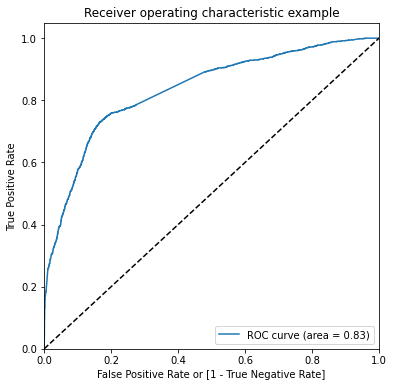

In [595]:
# ploting ROC curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### <b><i>Finding Optimal cutoff</i></b>

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [596]:
# crearing columns with different probability cutoffs and adding them to y_train_pred_final df 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.234395,3832,0,1,1,1,0,0,0,0,0,0,0
1,0,0.219347,3318,0,1,1,1,0,0,0,0,0,0,0
2,1,0.219347,5529,0,1,1,1,0,0,0,0,0,0,0
3,0,0.265849,5185,0,1,1,1,0,0,0,0,0,0,0
4,0,0.219347,6522,0,1,1,1,0,0,0,0,0,0,0


In [597]:
from sklearn.metrics import confusion_matrix # importing confusion matrix method

In [598]:
# Clculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity']) # creating a dataframe   

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df) 

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.377289     1.000000     0.000000
0.1          0.1  0.438764     0.991558     0.103836
0.2          0.2  0.640866     0.903757     0.481586
0.3          0.3  0.788183     0.748417     0.812276
0.4          0.4  0.795031     0.698607     0.853453
0.5          0.5  0.784520     0.626847     0.880051
0.6          0.6  0.768275     0.528915     0.913299
0.7          0.7  0.747890     0.415787     0.949105
0.8          0.8  0.725115     0.313634     0.974425
0.9          0.9  0.688485     0.181511     0.995652


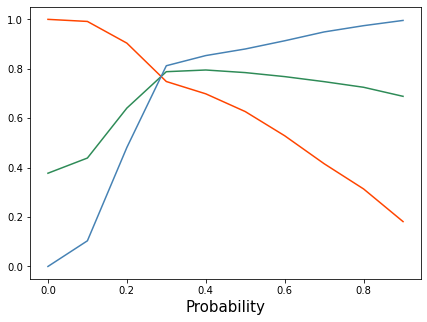

In [599]:
# ploting accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize = [7,5])
sns.lineplot(data= cutoff_df, x='probability', y='accuracy', color = 'seagreen')
sns.lineplot(data= cutoff_df, x='probability', y='sensitivity', color = 'orangered')
sns.lineplot(data= cutoff_df, x='probability', y='specificity', color = 'steelblue')
plt.xlabel('Probability', fontsize= 15)
plt.ylabel('', fontsize= 15)
plt.show()

###### From above graph we can observe 0.3 can be the optimal cutoff porbability

In [600]:
# taking 0.3 as the optimal cutoff for our final predicted values
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x> 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.234395,3832,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.219347,3318,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.219347,5529,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.265849,5185,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.219347,6522,0,1,1,1,0,0,0,0,0,0,0,0


In [601]:
# Now let us calculate the lead score
y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.234395,3832,0,1,1,1,0,0,0,0,0,0,0,0,23
1,0,0.219347,3318,0,1,1,1,0,0,0,0,0,0,0,0,22
2,1,0.219347,5529,0,1,1,1,0,0,0,0,0,0,0,0,22
3,0,0.265849,5185,0,1,1,1,0,0,0,0,0,0,0,0,27
4,0,0.219347,6522,0,1,1,1,0,0,0,0,0,0,0,0,22
5,0,0.049748,6247,0,1,0,0,0,0,0,0,0,0,0,0,5
6,0,0.131759,707,0,1,1,0,0,0,0,0,0,0,0,0,13
7,0,0.219347,3503,0,1,1,1,0,0,0,0,0,0,0,0,22
8,0,0.158473,8000,0,1,1,0,0,0,0,0,0,0,0,0,16
9,1,0.584608,8435,1,1,1,1,1,1,1,0,0,0,0,1,58


In [602]:
# checking accuracy score for cutoff = 0.3
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.7881828316610925


In [603]:
# creating confusion matrix for cutoff = 0.3
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3176,  734],
       [ 596, 1773]], dtype=int64)

In [604]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [605]:
# Calcualting Senitivity (Recall)
TP/ float(TP+FN)

0.7484170536091178

In [606]:
# Calcualting specificity
TN/ float(TN+FP)

0.8122762148337596

In [607]:
# Calculate false postive rate
FP/ float(FP+TN)

0.18772378516624041

In [608]:
# Precesion (positive predictive value)
TP/ float(TP+FP)

0.7072197846031113

In [609]:
# Negative predictive value
TN/ float(TN+FN)

0.8419936373276776

###### Precesion and recall

In [610]:
# importing methods to find precision and recall scores
from sklearn.metrics import precision_score, recall_score

In [611]:
# checking precesion score for cutoff = 0.3
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7072197846031113

In [612]:
# checking recall score for cutoff = 0.3
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7484170536091178

###### Calculating F1 Score for training dataset with cutoff equal to 0.3

In [613]:
precision = precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
recall = recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

In [614]:
# checking F1 score of training dataset for cutoff = 0.3 
F1 = (precision*recall)/(precision+recall)
F1

0.3636177194421657

#### <b><i>Precesion and Recall tradeoff</i></b>

In [615]:
# importing method to plot precesion and recall tradeoff curve
from sklearn.metrics import precision_recall_curve

In [616]:
p ,r ,thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob )

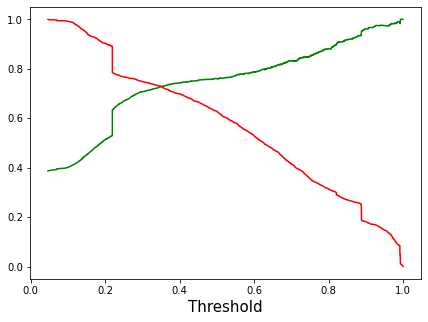

In [617]:
# plotting precesion and recall curve
plt.figure(figsize = [7,5])
sns.lineplot(thresholds, p[:-1],markers = 'g-', color = 'g') # ploting precesion curve
sns.lineplot(thresholds, r[:-1],markers = 'r-', color = 'r') # ploting recall curve
plt.xlabel('Threshold', fontsize = 15)
plt.show()

<h4><b><font color = 'salmon'>When using the sensitivity-specificity tradeoff, we found out that the optimal cutoff point was 0.3. Now, when we plotted the precision-recall tradeoff, we got the optimal cutoff about 0.35</font></b></h4>

###### Taking optimal cut_off as 0.35 and checking precision and recall score again

In [618]:
# taking 0.35 as the optimal cutoff
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x> 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.234395,3832,0,1,1,1,0,0,0,0,0,0,0,0,23
1,0,0.219347,3318,0,1,1,1,0,0,0,0,0,0,0,0,22
2,1,0.219347,5529,0,1,1,1,0,0,0,0,0,0,0,0,22
3,0,0.265849,5185,0,1,1,1,0,0,0,0,0,0,0,0,27
4,0,0.219347,6522,0,1,1,1,0,0,0,0,0,0,0,0,22


In [619]:
# Calculating the lead score for cutoff = 0.35
y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.234395,3832,0,1,1,1,0,0,0,0,0,0,0,0,23
1,0,0.219347,3318,0,1,1,1,0,0,0,0,0,0,0,0,22
2,1,0.219347,5529,0,1,1,1,0,0,0,0,0,0,0,0,22
3,0,0.265849,5185,0,1,1,1,0,0,0,0,0,0,0,0,27
4,0,0.219347,6522,0,1,1,1,0,0,0,0,0,0,0,0,22
5,0,0.049748,6247,0,1,0,0,0,0,0,0,0,0,0,0,5
6,0,0.131759,707,0,1,1,0,0,0,0,0,0,0,0,0,13
7,0,0.219347,3503,0,1,1,1,0,0,0,0,0,0,0,0,22
8,0,0.158473,8000,0,1,1,0,0,0,0,0,0,0,0,0,16
9,1,0.584608,8435,1,1,1,1,1,1,1,0,0,0,0,1,58


In [620]:
# checking accuracy score for cutoff = 0.35
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.7950310559006211


In [621]:
# creating confusion matrix for cutoff = 0.35
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion3

array([[3265,  645],
       [ 642, 1727]], dtype=int64)

In [622]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [623]:
# Calcualting Senitivity
TP/ float(TP+FN)

0.7289995778809625

In [624]:
# Calcualting specificity
TN/ float(TN+FP)

0.8350383631713555

In [625]:
# checking precision score for cutoff = 0.35
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7280775716694773

In [626]:
# checking recall score for cutoff = 0.35
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7289995778809625

###### Calculating F1 Score for training dataset with cutoff equal to 0.35

In [627]:
precision = precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
recall = recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

In [628]:
F1 = (precision*recall)/(precision+recall)
F1

0.3642691415313225

## Insight<hr>
* Using cutoff probability ($0.3$) from Sensitivity-Specificity tradeoff plot we got 
    * Accuracy Score of $78.8$%
    * Sensitivity(Recall) = $74.8$%
    * Precesion = $70.7$%
    * Specificity = $81.2$%
* Using cutoff probability ($0.35$) from Precesion-Recall tradeoff plot we got 
    * Accuracy Score of $79.5$%
    * Sensitivity(Recall) = $72.8$%
    * Precesion = $72.8$%
    * Specificity = $83.5$%

### <b><i>As we have a bit more emphasis on sensitivity because we want to predict hot leads we will choose 0.3 as our final optimal cutoff</i></b>

In [629]:
# taking 0.3 as the optimal cutoff
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x> 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.234395,3832,0,1,1,1,0,0,0,0,0,0,0,0,23
1,0,0.219347,3318,0,1,1,1,0,0,0,0,0,0,0,0,22
2,1,0.219347,5529,0,1,1,1,0,0,0,0,0,0,0,0,22
3,0,0.265849,5185,0,1,1,1,0,0,0,0,0,0,0,0,27
4,0,0.219347,6522,0,1,1,1,0,0,0,0,0,0,0,0,22


In [630]:
# Calculating the lead score for optimal cutoff = 0.3
y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.sample(10)

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
2426,0,0.219347,5616,0,1,1,1,0,0,0,0,0,0,0,0,22
3106,1,0.880366,6010,1,1,1,1,1,1,1,1,1,1,0,1,88
3564,0,0.180813,1018,0,1,1,0,0,0,0,0,0,0,0,0,18
5725,1,0.789405,142,1,1,1,1,1,1,1,1,1,0,0,1,79
3378,0,0.219347,1604,0,1,1,1,0,0,0,0,0,0,0,0,22
538,1,0.819938,4965,1,1,1,1,1,1,1,1,1,1,0,1,82
1176,0,0.473904,8340,0,1,1,1,1,1,0,0,0,0,0,1,47
1844,1,0.887726,4403,1,1,1,1,1,1,1,1,1,1,0,1,89
3092,0,0.267980,5675,0,1,1,1,0,0,0,0,0,0,0,0,27
3335,0,0.127921,5690,0,1,1,0,0,0,0,0,0,0,0,0,13


In [631]:
# accuracy score for cutoff being 0.3
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.7881828316610925


### <b><i>Making Predictions on test dataset</i></b>

In [632]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe()
# checking statistical summary of non-binary numeric variables

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,2692.000000,2692.000000,2692.000000
mean,3.176077,474.704681,2.193536
std,3.046191,543.362983,1.908748
min,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000
50%,3.000000,239.500000,2.000000
75%,4.000000,885.000000,3.000000
max,19.000000,2272.000000,10.000000


In [633]:
# Transforming non-binary numeric variables
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])     

In [634]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe()
# checking statistical summary again

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,2692.000000,2692.000000,2692.000000
mean,-0.016748,-0.015021,-0.026555
std,1.012419,0.996680,0.979904
min,-1.072335,-0.885762,-1.152663
25%,-0.739980,-0.880260,-0.639287
50%,-0.075268,-0.446452,-0.125912
75%,0.257087,0.737575,0.387464
max,5.242422,3.281722,3.981093


In [635]:
# eliminating columns which arent in our final model (model 10)
X_test = X_test[X10.columns]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,current_occupation_Working Professional
346,0,0.257087,-0.451038,0,0,0,0,1,0,0
5797,0,-1.072335,-0.885762,1,0,0,0,0,0,1
2495,0,-0.407624,2.274702,1,0,0,0,0,0,0
6337,0,-0.407624,-0.005308,0,1,0,0,0,0,0
8674,0,-0.075268,-0.724346,0,0,1,0,0,0,0


Making predictions

In [636]:
X_test_sm = sm.add_constant(X_test) # adding constant to test dataframe

In [637]:
y_test_pred = res.predict(X_test_sm) # making predictions using test dataset
y_test_pred[:10] 

346     0.087830
5797    0.992303
2495    0.996482
6337    0.209630
8674    0.136871
4901    0.331807
2827    0.125091
2478    0.194117
6989    0.768765
7049    0.219347
dtype: float64

In [638]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
346,0.087830
5797,0.992303
2495,0.996482
6337,0.209630
8674,0.136871


In [639]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df['LeadID'] = y_test_df.index # Putting CustID to index

In [640]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [641]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,LeadID,0
0,0,346,0.087830
1,1,5797,0.992303
2,1,2495,0.996482
3,0,6337,0.209630
4,0,8674,0.136871


In [642]:
# Renaming the column 0 to Converted_prob
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [643]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadID','Converted','Converted_Prob'], axis=1)
y_pred_final.head()

,LeadID,Converted,Converted_Prob
0,346,0,0.087830
1,5797,1,0.992303
2,2495,1,0.996482
3,6337,0,0.209630
4,8674,0,0.136871


In [644]:
# adding final_predicted column with cutoff as 0.3
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,LeadID,Converted,Converted_Prob,final_predicted
0,346,0,0.087830,0
1,5797,1,0.992303,1
2,2495,1,0.996482,1
3,6337,0,0.209630,0
4,8674,0,0.136871,0


In [645]:
# Calculating the lead score
y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(10)

,LeadID,Converted,Converted_Prob,final_predicted,lead_score
0,346,0,0.087830,0,9
1,5797,1,0.992303,1,99
2,2495,1,0.996482,1,100
3,6337,0,0.209630,0,21
4,8674,0,0.136871,0,14
5,4901,1,0.331807,1,33
6,2827,1,0.125091,0,13
7,2478,1,0.194117,0,19
8,6989,1,0.768765,1,77
9,7049,0,0.219347,0,22


###### Looking at Accuracy score and all other metrics

In [646]:
# checking accuracy score for test dtaset
print(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

0.8020059435364042


In [647]:
# creating and checking confusion matrix for test dataset
confusion4 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion4

array([[1382,  285],
       [ 248,  777]], dtype=int64)

In [648]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [649]:
# Calcualting Senitivity of test dataset
TP/ float(TP+FN)

0.7580487804878049

In [650]:
# Calcualting specificity of test dataset
TN/ float(TN+FP)

0.8290341931613677

In [651]:
# checking precision score for test datset for cutoff being 0.3
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.731638418079096

In [652]:
# checking recall score for test datset for cutoff being 0.3
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7580487804878049

###### Calculating F1 Score for testing dataset where cutoff is equal to 0.3

In [653]:
precision = precision_score(y_pred_final.Converted, y_pred_final.final_predicted)
recall = recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

In [654]:
F1 = (precision*recall)/(precision+recall)
F1

0.37230474365117394

## Insight<hr>

* We got a good accuracy score of 80% on test dataset
* We got a sensitivity(recall) value of more than $75$% and specificity value of about $82$%
* We got a precesion score of $73$% and F1 score of $0.37$

# Final Observations <hr>
* Training Dataset
        
      * Accuracy Score = 78.8%
      * Sensitivity(Recall) = 74.8%
      * Precesion = 70.7%
      * Specificity = 81.2% 
      
* Testing Dataset
        
      * Accuracy Score = 80%
      * Sensitivity(Recall) = 75%
      * Precesion = 73%
      * Specificity = 82%  

# Summary<hr>

* Before building the machine learning model we had a conversion rate of 38% but after we built the model we were able to predict 80% of leads which converted giving us a conversion rate of 80%, i.e. an increase of 42%.<br>
* Customers which spend about 10 minutes or more on the website or have Lead Origin as 'Lead add form' should be considered as hot leads as they have a high probability of getting converted.<br>
* Customers having Lead Source as 'Reference' or 'Wellingak Website' OR customers which are working professional have a high probability of getting converted and should be considered as Hot Leads<br>
* Leads generated from customers which visit the website more often (more than 5 times) have a moderate to high chance of getting converted